
Emerton is a global high-end strategy consulting group specialities in Strategy consulting, Digital transformation, Business transformation, Innovation & Data analytics

Analyse and predict the win/bidding possibilities of deals/project for an IT consulting company and see how the possibility of bidding is impacted by other agents. It also will enable the company to manage the effort required to win the deal to meet the growth targets. To recommend top 5 Head-Bid managers

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
cd /content/drive/MyDrive/Colab_Notebooks/Learnbay_Interviews/WIN_Predcition_Finance

/content/drive/MyDrive/Colab_Notebooks/Learnbay_Interviews/WIN_Predcition_Finance


In [79]:
ls

Project_Win_Prediction_Analytics.pdf  WIN_Prediction_Finance.ipynb
Win_Prediction_Data.xlsx


In [80]:
# Importing the basic packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import os

import tensorflow as tf #tensor flow is the backend
from tensorflow import keras # keras is the frontend or wrapper; Keras is best for DS.. In Tensorflow if its
                             # 100 lines of code, In Keras it will be 5 lines of code.

In [81]:
 #importing the dataset

 my_data = pd.read_excel('Win_Prediction_Data.xlsx')
 my_data

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


In [82]:
newdata = my_data.copy()
newdata

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


In [83]:
#Missing data

newdata.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [84]:
newdata.isnull().sum()/len(newdata) * 100 # Missing percentage is .78%

Client Category     0.78521
Solution Type       0.00000
Deal Date           0.00000
Sector              0.00000
Location            0.00000
VP Name             0.00000
Manager Name        0.00000
Deal Cost           0.00000
Deal Status Code    0.00000
dtype: float64

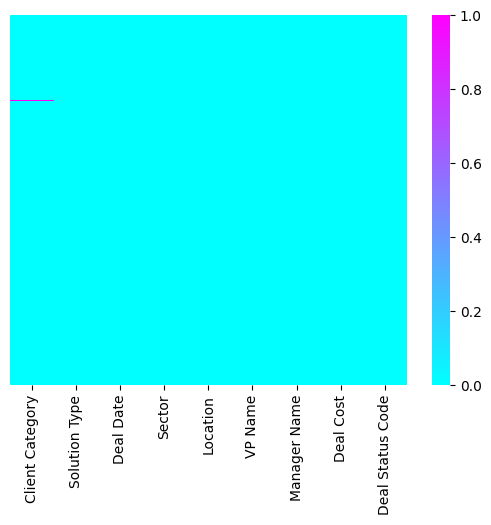

In [85]:
sns.heatmap(newdata.isnull(), yticklabels = False, cbar=True, cmap='cool')
plt.show()

In [86]:
  newdata.info()

  # Most of the datatypes are object. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [87]:
# Handling Missing Values

Client_Category = newdata['Client Category'].value_counts()  

# Maximum values are from Client Category of 1763

In [88]:
  #Imputinig the 'Client Category' field missing values with 'Others' class (as the others class has more valaues).

newdata['Client Category'] = newdata['Client Category'].fillna('Others')

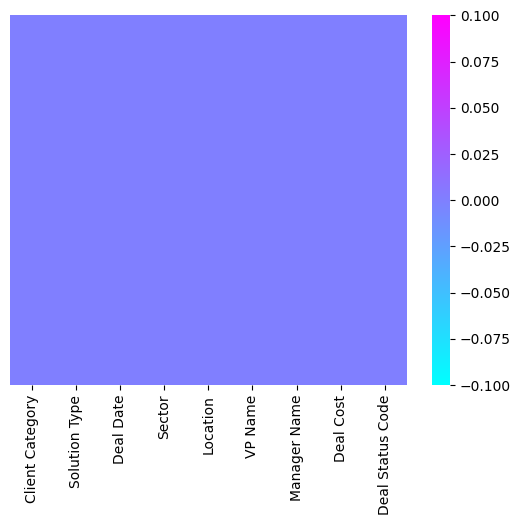

In [89]:
sns.heatmap(newdata.isnull(), yticklabels = False, cbar=True, cmap='cool')
plt.show()

In [90]:
# Describe the Object data type

sumcat = newdata.describe(include='O')
sumcat

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Status Code
count,10061,10061,10061,10061,10061,10061,10061
unique,41,67,25,13,43,278,2
top,Others,Solution 32,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1842,1439,2693,3360,1166,323,6306


In [91]:
newdata['Deal Status Code'].value_counts() 

# Balanced dataset = (2 * Minority > Majority) 
#                  = 2 * 3755 > 6306
#                  = 7510 > 6306  ( So its a Balanced dataset; so we need not to handle the imbalance dataset)



Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64

In [92]:
  Client_Category_index = newdata["Client Category"].value_counts()
  Client_Category_index

Others                   1842
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [93]:
Client_Category_index = newdata["Client Category"].value_counts().index
Client_Category_index

Index(['Others', 'Internal', 'Services_based', 'Tech', 'Domestic Public Bank',
       'International Bank', 'Consulting', 'Finance', 'Telecom', 'Power ind',
       'Domestic Private Bank', 'Insurance', 'Consumer Good', 'Automobiles',
       'Infrastructure', 'Domestic Bank', 'Retail_market', 'Govt',
       'Hospitality', 'Manufacturing', 'Pharma', 'Healthcare', 'Electronics',
       'Media_Journal', 'Industries', 'Research Development', 'Energy',
       'Knowledge', 'Management', 'Govt Bank Special', 'Payment', 'Energy ',
       'e-commerce', 'Airpline', 'Holding', 'International Org', 'Logistics',
       'Real Estate', 'Share_market', 'Tax_audit', 'Medical '],
      dtype='object')

8. Recommending top 5 and 10 combination of SBU Head-Bid Manager.

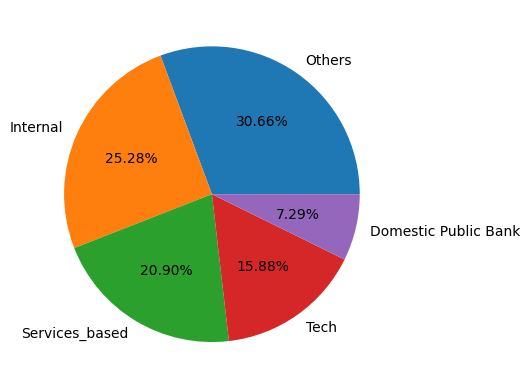

In [94]:
plt.pie(Client_Category[:5], labels=Client_Category_index[:5], autopct = '%1.2f%%')
plt.show()

# Pie chart is good for 5 values. If its more than 5 , then it has to be go for Bar graph

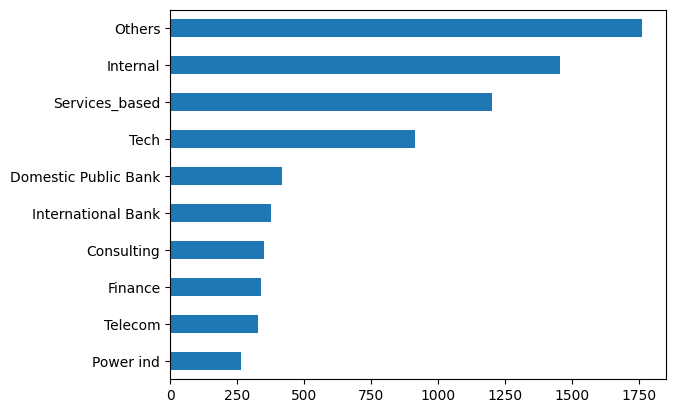

In [95]:
# If its more than for 10 categories, them Bar Graph will be better.

Client_Category[:10].plot(kind='barh').invert_yaxis()

# Recommendation for top 5 and 10 Solution Type

In [96]:
Solution_Type = newdata['Solution Type'].value_counts() 


In [97]:
Solution_Type_index = newdata['Solution Type'].value_counts().index
Solution_Type_index

Index(['Solution 32', 'Solution 9', 'Solution 10', 'Solution 39',
       'Solution 67', 'Solution 37', 'Solution 59', 'Solution 12',
       'Solution 8', 'Solution 29', 'Solution 6', 'Solution 13', 'Solution 31',
       'Solution 4', 'Solution 28', 'Solution 38', 'Solution 7', 'Solution 11',
       'Solution 20', 'Solution 52', 'Solution 40', 'Solution 30',
       'Solution 14', 'Solution 36', 'Solution 58', 'Solution 47',
       'Solution 35', 'Solution 55', 'Solution 33', 'Solution 48',
       'Solution 16', 'Solution 26', 'Solution 49', 'Solution 2',
       'Solution 34', 'Solution 42', 'Solution 61', 'Solution 41',
       'Solution 65', 'Solution 44', 'Solution 17', 'Solution 15',
       'Solution 50', 'Solution 25', 'Solution 1', 'Solution 43',
       'Solution 24', 'Solution 62', 'Solution 5', 'Solution 27',
       'Solution 46', 'Solution 3', 'Solution 22', 'Solution 53',
       'Solution 51', 'Solution 45', 'Solution 63', 'Solution 23',
       'Solution 54', 'Solution 21', 'Sol

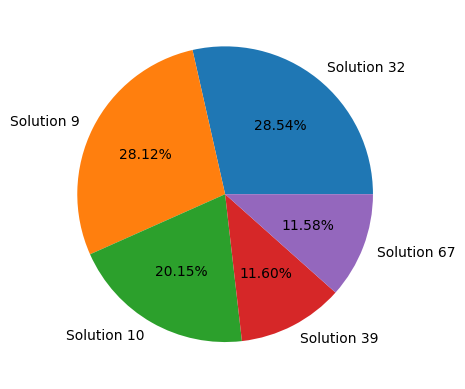

In [98]:
plt.pie(Solution_Type[:5], labels=Solution_Type_index[:5], autopct = '%1.2f%%')
plt.show()

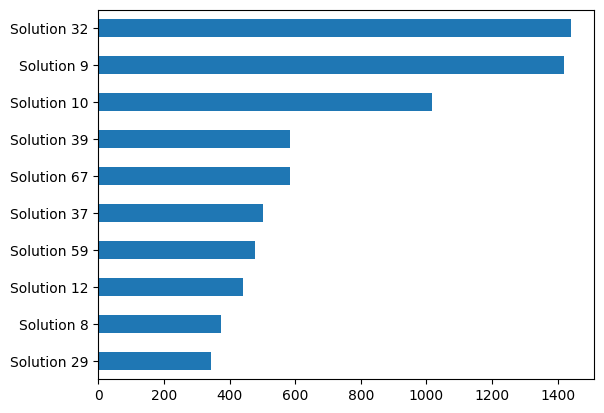

In [99]:
Solution_Type[:10].plot(kind='barh').invert_yaxis()

# Recommendation for top 5 and 10 VP Name

In [100]:
VP_Name = newdata['VP Name'].value_counts()

In [101]:
VP_Name_index = newdata['VP Name'].value_counts().index
VP_Name_index

Index(['Mervin Harwood', 'Ankita Aggarwal', 'Sargar Deep Rao',
       'Long Bergstrom', 'Mangesh K. Singh', 'Rosanna Maynez', 'Ekta Zutshi',
       'Rahul Bajpai', 'neeraj kumar', 'Son Mcconnaughy', 'som dutt',
       'Hardeep Suksma', 'Brendon Wycoff', 'Clinton Mani', 'Saurabh Singh',
       'Jewell Tunstall', 'Rudraksh Sharma', 'Gopa Trilochana',
       'Russell Dahlen', 'Molly Eakes', 'Alam Syed', 'Gaurav Sameria',
       'Varsha Arora', 'Gayle Molter', 'Vidur Hukle', 'Earline Langton',
       'Manpreet Singh', 'Mayank Mewar', 'Marcella Mo', 'Rahul Kocher',
       'Man Suddeth', 'Jitendra Choudhary', 'Prashant Rawat', 'Lilli Storrs',
       'Vikram Rawat', 'Kamelesh Srinivasan', 'Dennis Faux', 'Visvajeet Das',
       'Waylon Mulder', 'P. Somya', 'Kirk Hofmeister', 'Sarthak Batra',
       'md. afsar'],
      dtype='object')

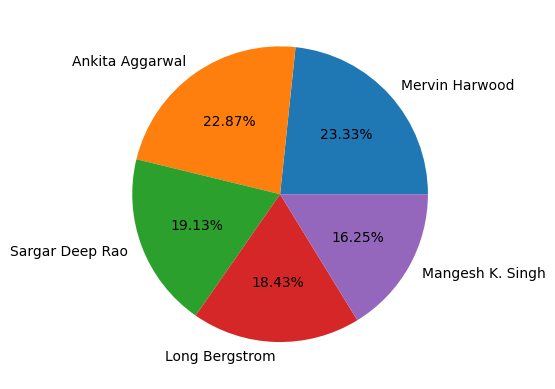

In [102]:
plt.pie(VP_Name[:5], labels=VP_Name_index[:5], autopct = '%1.2f%%')
plt.show()

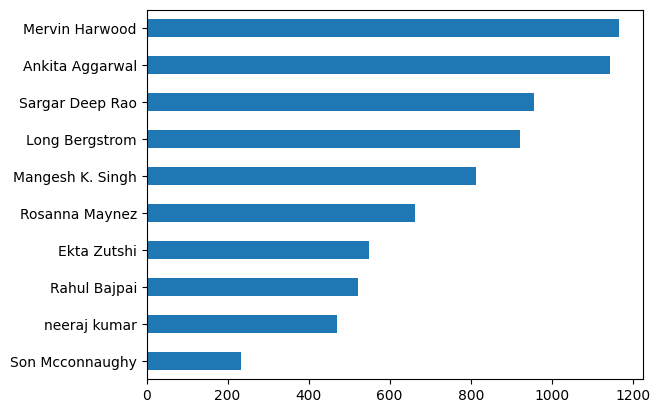

In [103]:
VP_Name[:10].plot(kind='barh').invert_yaxis()

# Recommendation for 5 and 10 Manager Name

In [104]:
Manager_Name = newdata['Manager Name'].value_counts()

In [105]:
Manager_Name_index = newdata['Manager Name'].value_counts()
Manager_Name_index

Molly Eakes        323
Rudraksh Sharma    270
Desmond Krout      230
Gayle Molter       186
Manpreet Singh     181
                  ... 
Anju Nanda           1
Taran Singh          1
pooran chand         1
Rishab Bhatt         1
Cleotilde Biron      1
Name: Manager Name, Length: 278, dtype: int64

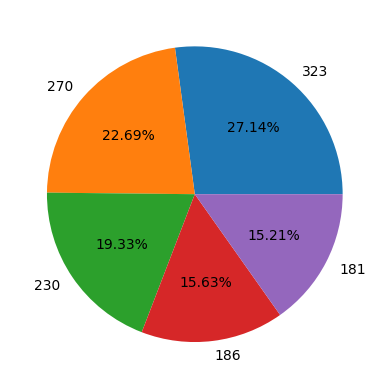

In [106]:
plt.pie(Manager_Name[:5], labels=Manager_Name_index[:5], autopct = '%1.2f%%')
plt.show()

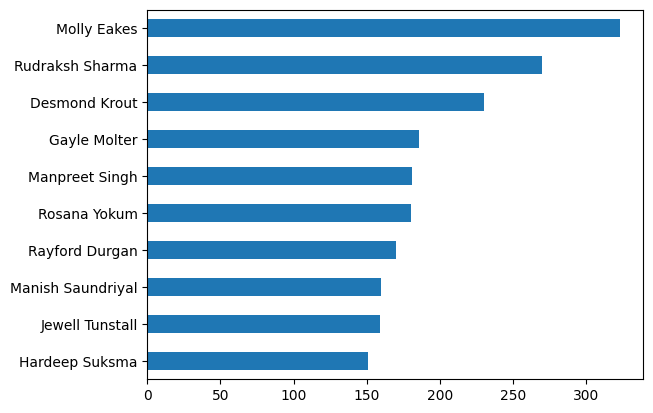

In [107]:
Manager_Name[:10].plot(kind='barh').invert_yaxis()

# Deal Status Code

In [108]:
Deal_Status_code = newdata['Deal Status Code'].value_counts()  

In [109]:
Deal_Status_Code_index = newdata["Deal Status Code"].value_counts().index
Deal_Status_Code_index

Index(['Lost', 'Won'], dtype='object')

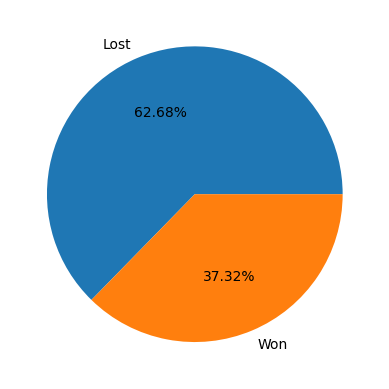

In [110]:
plt.pie(Deal_Status_code[:5], labels=Deal_Status_Code_index[:5], autopct = '%1.2f%%')
plt.show()

<Axes: >

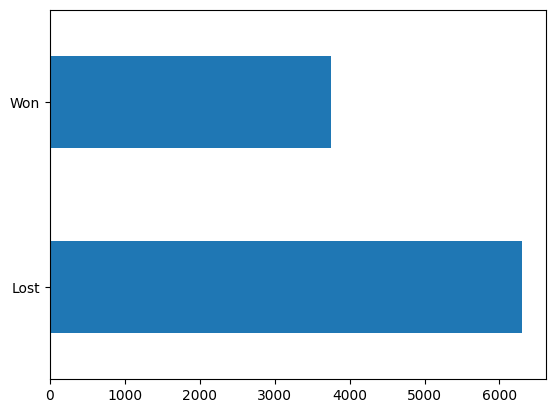

In [111]:
Deal_Status_code[:10].plot(kind='barh')

# Relationship between Independent Vs Dependent variables

In [112]:
newdata.columns

# Mainly we need relationships between Client Category, Solution type, VP name, Manager name with Deal Status Code

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code'],
      dtype='object')

In [113]:
newdata.head(2)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won


Relationship between Client Category and Deal Status Code

In [114]:
rel_client_cat = newdata[['Client Category', 'Deal Status Code']].groupby(['Client Category', 'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Code'})


In [115]:
rel_client_cat

,Client Category,Deal Status Code,Deal Status Code
0,Airpline,Lost,22
1,Airpline,Won,5
2,Automobiles,Lost,112
3,Automobiles,Won,66
4,Consulting,Lost,182
...,...,...,...
77,Tech,Won,313
78,Telecom,Lost,192
79,Telecom,Won,135
80,e-commerce,Lost,20


Relationship between Solution Type and Deal Status Code

In [116]:
Solution_Type_cat = newdata[['Solution Type', 'Deal Status Code']].groupby(['Solution Type', 'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Code'})

In [117]:
Solution_Type_cat

,Solution Type,Deal Status Code,Deal Status Code
0,Solution 1,Lost,2
1,Solution 1,Won,3
2,Solution 10,Lost,690
3,Solution 10,Won,326
4,Solution 11,Lost,88
...,...,...,...
111,Solution 7,Won,62
112,Solution 8,Lost,190
113,Solution 8,Won,184
114,Solution 9,Lost,1018


Relationship between VP Name and Deal Status Code

In [118]:
VP_Name_cat = newdata[['VP Name', 'Deal Status Code']].groupby(['VP Name', 'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Code'})

In [119]:
VP_Name_cat

,VP Name,Deal Status Code,Deal Status Code
0,Alam Syed,Lost,62
1,Alam Syed,Won,64
2,Ankita Aggarwal,Lost,866
3,Ankita Aggarwal,Won,277
4,Brendon Wycoff,Lost,132
...,...,...,...
77,md. afsar,Lost,2
78,neeraj kumar,Lost,254
79,neeraj kumar,Won,217
80,som dutt,Lost,138


Relationship between Manager and Deal Status Code

In [120]:
Manager_Name_cat = newdata[['Manager Name', 'Deal Status Code']].groupby(['Manager Name', 'Deal Status Code']).size().reset_index().rename(columns={0:'Total Count'})
Manager_Name_cat

,Manager Name,Deal Status Code,Total Count
0,Aastha Gandhi,Won,1
1,Abhinav Warrier,Lost,80
2,Abhinav Warrier,Won,15
3,Abhishek Singhal,Lost,44
4,Abhishek Singhal,Won,23
...,...,...,...
470,sunder paal,Won,6
471,vansu dev,Lost,78
472,vansu dev,Won,54
473,vinit katariya,Lost,14


In [121]:
pd.pivot_table(newdata, index = 'Deal Status Code', columns = 'Manager Name', values = 'Deal Cost')

Manager Name,Aastha Gandhi,Abhinav Warrier,Abhishek Singhal,Abhiskek Kumar,Abhiskhek D,Abram Fines,Aditya Kumar,Aditya Tondon,Ahdarsha Jha,Ahswini Saini,...,shafibul,sharat chandran,sheak shakir,shiv kumar,shiv shakti singh,shyam kumar,som dutt,sunder paal,vansu dev,vinit katariya
Deal Status Code,,,,,,,,,,,,,,,,,,,,,
Lost,NaN,588808.824000,772860.963182,949894.957857,440767.973889,501764.706000,792647.06,1058823.53,924866.311818,1029411.77,...,2.867647e+06,441176.470,882352.940000,219019.61,1470588.24,715250.000000,NaN,882352.940,9.687406e+05,1.098739e+06
Won,242647.06,302235.296667,476956.522609,587507.740789,375658.823600,714127.789655,250367.65,NaN,351102.940000,601470.59,...,NaN,989411.765,461127.451667,NaN,NaN,307769.608333,198627.45,371960.785,1.253295e+06,3.917206e+06


In [122]:
pd.pivot_table(newdata, index = 'Deal Status Code', columns = 'VP Name', values = 'Deal Cost')

VP Name,Alam Syed,Ankita Aggarwal,Brendon Wycoff,Clinton Mani,Dennis Faux,Earline Langton,Ekta Zutshi,Gaurav Sameria,Gayle Molter,Gopa Trilochana,...,Saurabh Singh,Son Mcconnaughy,Varsha Arora,Vidur Hukle,Vikram Rawat,Visvajeet Das,Waylon Mulder,md. afsar,neeraj kumar,som dutt
Deal Status Code,,,,,,,,,,,,,,,,,,,,,
Lost,1.087144e+06,654206.63000,1.096894e+06,776755.218548,554656.861667,1.189219e+06,7.912821e+05,554590.017879,7.291971e+05,1.464321e+06,...,761066.176429,1.517227e+06,7.272255e+05,615517.241724,1.681103e+06,1176470.59,235294.12,3235294.12,478943.956142,554650.469710
Won,1.172937e+06,503528.35065,1.909288e+06,600857.843500,315294.120000,6.034314e+05,1.021396e+06,586433.823958,1.282863e+06,8.195701e+05,...,962863.052187,5.470632e+05,3.454505e+06,540581.233095,5.161111e+05,5588235.29,88235.29,NaN,693700.190092,562977.044756


# Which Year my Revenue is High

In [123]:
import datetime
newdata['Deal_Date_Year'] = newdata['Deal Date'].dt.year # For Year
# Like Year wise Report Card

In [124]:
newdata.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_Year
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011


# Yearly Data

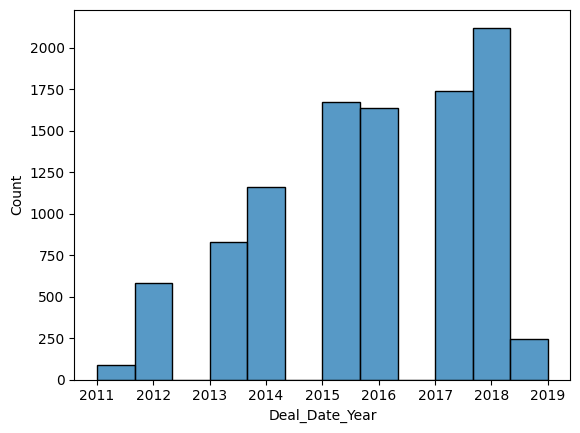

In [125]:
sns.histplot(newdata.Deal_Date_Year, bins=12)
plt.show()

#Observations: From 2011 to 2019 there is a upward trend moving on.

# Monthly Data

In [126]:
newdata['Deal_Date_Month'] = newdata['Deal Date'].dt.month # For month

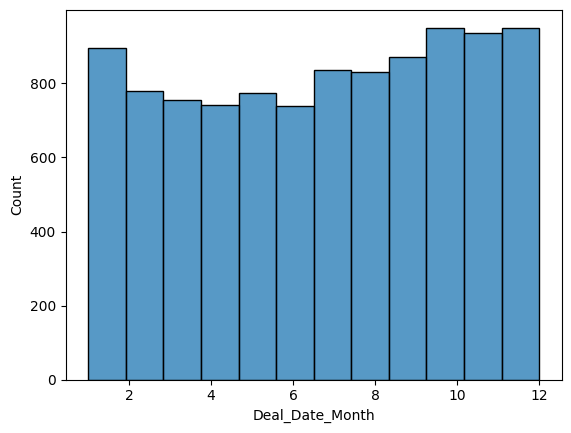

In [127]:
sns.histplot(newdata.Deal_Date_Month, bins=12)
plt.show()

# Quarterly Data

In [128]:
newdata['Deal_Date_quarter'] = newdata['Deal Date'].dt.quarter # For Quarter

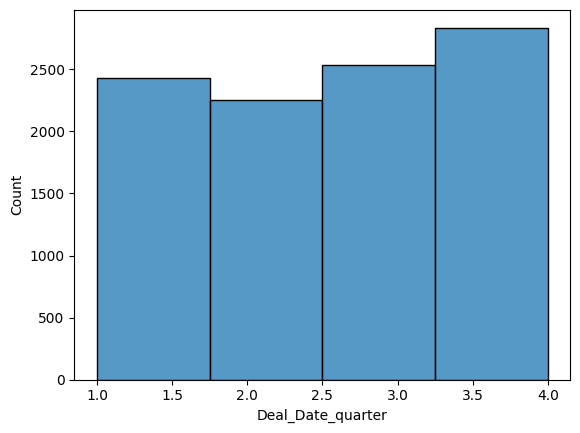

In [129]:
sns.histplot(newdata.Deal_Date_quarter, bins=4)
plt.show()

# Heatmap: 
for checking collinearity like which variable has the strong correlation

<Axes: >

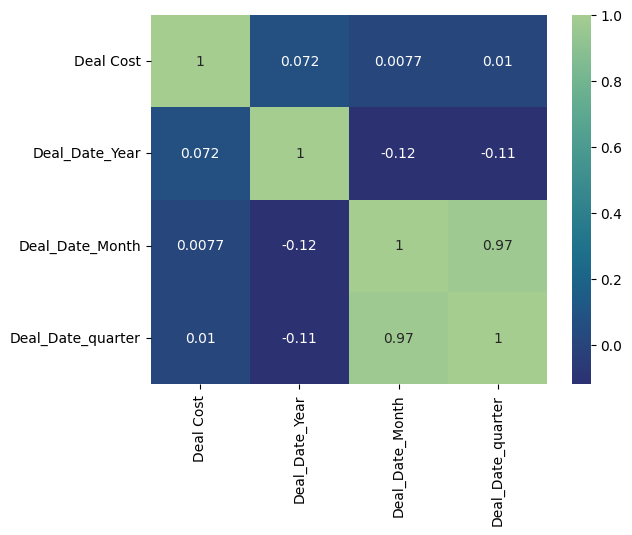

In [130]:
sns.heatmap(newdata.corr(), annot=True, cmap='crest_r')

In [131]:
newdata.head(5)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_Year,Deal_Date_Month,Deal_Date_quarter
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


In [132]:
newdata['Client Category'].value_counts()

Others                   1842
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [133]:
newdata.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code',
       'Deal_Date_Year', 'Deal_Date_Month', 'Deal_Date_quarter'],
      dtype='object')

In [134]:
newdata = newdata.drop(['Deal Date'], axis=1)

In [135]:
newdata.columns

Index(['Client Category', 'Solution Type', 'Sector', 'Location', 'VP Name',
       'Manager Name', 'Deal Cost', 'Deal Status Code', 'Deal_Date_Year',
       'Deal_Date_Month', 'Deal_Date_quarter'],
      dtype='object')

In [136]:
newdata['Client Category'] = newdata['Client Category'].astype('category')
newdata['Client Category'] = newdata['Client Category'].cat.codes

newdata['Solution Type'] = newdata['Solution Type'].astype('category')
newdata['Solution Type'] = newdata['Solution Type'].cat.codes

newdata['Sector'] = newdata['Sector'].astype('category')
newdata['Sector'] = newdata['Sector'].cat.codes

newdata['Location'] = newdata['Location'].astype('category')
newdata['Location'] = newdata['Location'].cat.codes

newdata['VP Name'] = newdata['VP Name'].astype('category')
newdata['VP Name'] = newdata['VP Name'].cat.codes

newdata['Manager Name'] = newdata['Manager Name'].astype('category')
newdata['Manager Name'] = newdata['Manager Name'].cat.codes

newdata['Deal Status Code'] = newdata['Deal Status Code'].astype('category')
newdata['Deal Status Code'] = newdata['Deal Status Code'].cat.codes

In [137]:
newdata.head(5)

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_Year,Deal_Date_Month,Deal_Date_quarter
0,39,64,16,7,6,82,150000.00,1,2012,3,1
1,39,64,16,7,6,82,744705.88,1,2012,9,3
2,19,54,12,12,6,183,60000.00,0,2011,8,3
3,19,54,12,12,6,183,60000.00,0,2011,4,2
4,19,25,12,12,6,183,80882.35,0,2011,6,2


In [138]:
# We can remove Deal_Date_Year, Deal_Date_Month, Deal_Date_quarter as these were needed only for EDA.

newdata = newdata.iloc[:,0:8]

In [139]:
newdata

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,39,64,16,7,6,82,150000.00,1
1,39,64,16,7,6,82,744705.88,1
2,19,54,12,12,6,183,60000.00,0
3,19,54,12,12,6,183,60000.00,0
4,19,25,12,12,6,183,80882.35,0
...,...,...,...,...,...,...,...,...
10056,31,66,24,7,29,182,588235.29,0
10057,19,55,12,12,29,198,777058.82,1
10058,31,66,24,7,29,182,588235.29,0
10059,31,58,24,7,19,50,3042058.82,1


# Split the data into X and Y

In [140]:
x = newdata.iloc[:,0:-1].values
y = newdata['Deal Status Code'].values

#Feature Scaling: 

Since the 'Deal Cost' column is too much compared to other values, we need to do 'Feature Scaling'.


In [141]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x)

In [142]:
x1

array([[ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.38084443],
       [ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.01369972],
       [-0.33339304,  0.86106354,  0.01663725, ..., -1.11119992,
         0.60004268, -0.43640639],
       ...,
       [ 0.70843971,  1.38496843,  2.32277814, ...,  0.79154462,
         0.58701806, -0.11029764],
       [ 0.70843971,  1.0356985 ,  2.32277814, ..., -0.03573561,
        -1.13223202,  1.40458284],
       [ 0.44798152,  1.38496843, -1.71296842, ...,  1.20518474,
         1.0298552 , -0.38266018]])

# Splitting the Data into Train & Test

In [143]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, train_size=0.70, random_state=101 )

# Deep Neural Network 1:30

In [144]:
import tensorflow as tf
from tensorflow import keras

In [145]:
# Architecture - 1) Sequential (If its going in sequence) 2) Functional (No sequence; for image processing)

dnn = tf.keras.models.Sequential()  # API
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))   # 1st Hidden layer ==> Dense means my model is fully connected
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))   # 2nd Hidden layer
dnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output ==> Classification problem, 1 answer/output, sigmoid(logistic Regression)
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # compilation ;Connector; learn as why adam is the best one; loss = error (classification problem)
dnn.fit(x_train, y_train, batch_size=32, epochs=100) # batch_size means split_data ,its not the full data, convert it to 32 size; epoch = forward propagation & backward propagation

# Accuracy keep on increasing. This is called back propagation # At the 100th run, the final accuarcy is accuracy: 0.6779






Epoch 1/100
221/221 [==============================] - 1s 2ms/step - loss: 0.6849 - accuracy: 0.5869
Epoch 2/100
221/221 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.6176
Epoch 3/100
221/221 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6190
Epoch 4/100
221/221 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.6187
Epoch 5/100
221/221 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.6197
Epoch 6/100
221/221 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.6203
Epoch 7/100
221/221 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6237
Epoch 8/100
221/221 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6264
Epoch 9/100
221/221 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6302
Epoch 10/100
221/221 [==============================] - 0s 2ms/step - loss: 0.6400 - accura

To Improve the accuracy, we are increasing the count as epochs=50, the best part is it will restart from where it left (ex: accuracy: 0.6779); & not from the beginning.

In [146]:
dnn.fit(x_train, y_train, batch_size=32, epochs=50) 

Epoch 1/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.6772
Epoch 2/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.6805
Epoch 3/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.6792
Epoch 4/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.6788
Epoch 5/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.6782
Epoch 6/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.6778
Epoch 7/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.6799
Epoch 8/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.6823
Epoch 9/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.6798
Epoch 10/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.6798

In [147]:
dnn.fit(x_train, y_train, batch_size=32, epochs=50) 

Epoch 1/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.6901
Epoch 2/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.6897
Epoch 3/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.6945
Epoch 4/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.6896
Epoch 5/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.6945
Epoch 6/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.6909
Epoch 7/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.6916
Epoch 8/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.6938
Epoch 9/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.6918
Epoch 10/50
221/221 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.6909

In [148]:
y_pred = dnn.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

95/95 [==============================] - 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [149]:
from sklearn.metrics  import confusion_matrix, classification_report, accuracy_score

In [150]:
print(confusion_matrix(y_test, y_pred))

[[1470  485]
 [ 557  507]]


In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1955
           1       0.51      0.48      0.49      1064

    accuracy                           0.65      3019
   macro avg       0.62      0.61      0.62      3019
weighted avg       0.65      0.65      0.65      3019



In [152]:
print(accuracy_score(y_test, y_pred)) # so we need improvement as the accuracy score is only 0.667108

0.6548526001987413
